# Homework Assignment 3 (Individual)

---

### <p style="text-align: right;"> &#9989; Mahitha Karnati</p>


---
## Creating a natural selection model using ABMs and OOP

In this homework, we have two sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 31.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 0: Upload this file to your Git repository to track your progress on your assignment (15 pt)

#### Note: This is different from previous assignments!

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. We also want you to get practice with **branching**, as that will be important and useful for your group projects. 

**&#9989; Do the following**:


1. Navigate to your `cmse202-s23-turnin` repository 
2. Create a new branch called `hw03_branch` and move into it. 
3. Create a new directory called `hw-03`.
4. Move this notebook into that **new directory**, then **add** and **commit** it. 
5. Finally, to test that everything is working, `git push` the file and new branch so they end up in your GitHub repository. 

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory and `hw-03` branch that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



---

# A natural selection model
For this homework assignment, you will be building an Agent-Based Model (ABM) that simulates natural selection in action. You will build two classes for mice, which inhabit the world, and one class for a (predator) hawk. The mice have different fur color, which allows them to blend in better (or worse) with their environment. This model is (loosely) based on an actual case of natural selection involving the [Peppered Moth](https://en.wikipedia.org/wiki/Peppered_moth_evolution).

For this assignment, you will be working with an environment class, which will allow you to actually run your simulation. We've also provided you with a generic `Animal_Agent`, which you will use to build your own classes for the natural selection model. You will need to download the generic `Animal_Agent` class and `Environment` class. You can find them here:

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Animal_Agent_Class.py`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Environment.py`

## 1. Building Up an Environment with Animal Agents



### 1.1 (5 Points)

Spend some time exploring the new classes a bit. **Write a few sentences giving a high-level description of how this model works. What are the different classes? What do they do? How can they be used to create an Agent-Based Model?**


 the Animal agent class shows an animal that interacts to other animals. The class has attributes such as the x and y position, age, age limit at which the agent dies of old age , the catch radius, the gestation period, and the color of the agent.The methods include proceeding a random walk,setting alleles of this mouse, drawing the animal agent,checking if the animal agent has died of old age, getting distance between agents, finding prey for predators, and creating new agents. This can be used to create an Agent-Based Model by using the functions that are inside of it because they all contribute to simulating actons of the agents.The environment class focuses more on the whole populaton and vislaizing the growth of the population.This class includes methods to add agents, simulate, and simulate plot populations. Simulate just shows how the animals move around in the environment and the simulate plot populations method graphs the population of the agents over time.This class can be used to create an Agent-Based Model by conntributing to their interactions of individual agents in the environment. The environment class shows how the predators and prey interact in an environment.

### 1.2 (15 Points)

Construct a new `Environment` object and a new `Animal_Agent` object. Specify that the `Animal_Agent` object is a female. Add the `Animal_Agent` object to the `Environment` object. Run the `simulation` method. You should see there's a bug in the code. **Fix the bug and explain what the cause was.**

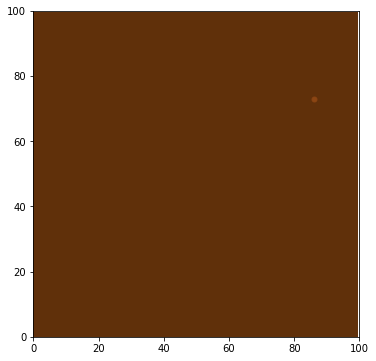

In [2]:
#Write your code here
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import time  
from IPython.display import display, clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import Environment
import Animal_Agent_Class
env = Environment.Environment()
agents= Animal_Agent_Class.Animal_Agent(sex="F")
env.add_agent(agents)

env.simulate(10)

The bug was that in the simulate function when they called the procreate function they didnt follow the correct order when they added their arguments, The list with the animal objects should be listed first and then the current time.

### 1.3 (5 Points)

**In the cell below, copy your `simulation` code from above and rerun it with the bug fixed to show how the animal runs around.** You should use the `set_allele()` method in the `Animal_Agent` class to randomly assign two alleles to your `Animal_Agent` object.


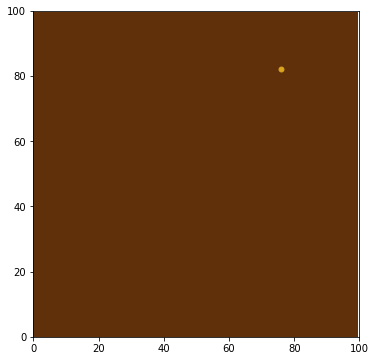

In [3]:
#Write your code here
import random
num1 = random.randint(0, 1)
num2 = random.randint(0, 1)
agents.set_allele(random.randint(0, 1),random.randint(0, 1))
env.simulate(10)

### 1.4 (5 Points)

**Now add in a predator and let it evolve. Do you see the predator hunting the prey object?** Make sure to set the `ptype` to predator, and the `shape` and `color` to be something different from the prey you defined above (E.g., a shape of "P" and a color of "red".)

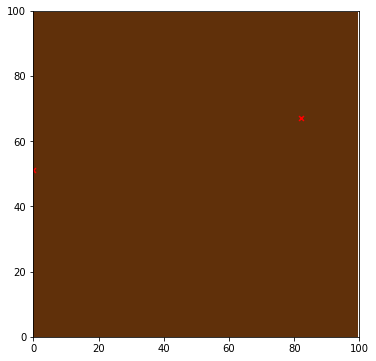

In [5]:
#Write your code here
pred= Animal_Agent_Class.Animal_Agent(sex="F",ptype="Predator", shape= "x", color="red")
env.add_agent(pred)
env.simulate(100)

### 1.5 (15 Points)

**Now add *multiple* predator and prey agents ($N > 1$ for both). Find a combination of $N_{\mathrm{Prey}}$ and $N_{\mathrm{Predator}}$ where the Prey can maintain a sustainable population (I.e., they aren't wiped out in the long run).**

- **NOTE 1:** Make sure you add both male and female Prey, so they can `Procreate`. 
- **NOTE 2:** We recommend using the `simulate_plot_populations()` method, so you can monitor the growth/decline of populations.

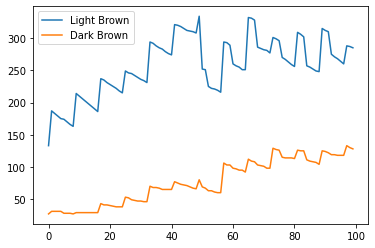

In [8]:
#Write your code here
env= Environment.Environment()

for x in range(0,80):
    f_prey= Animal_Agent_Class.Animal_Agent(sex="F",ptype="Prey", shape= "p", color="blue")
    m_prey=Animal_Agent_Class.Animal_Agent(sex="M",ptype="Prey", shape= "p", color="blue")
    f_prey.set_allele(random.randint(0, 1),random.randint(0, 1))
    m_prey.set_allele(random.randint(0, 1),random.randint(0, 1))
    env.add_agent(f_prey)
    env.add_agent(m_prey)
for x in range(0,4):
    m1_pred=Animal_Agent_Class.Animal_Agent(sex="M",ptype="Predator", shape= "x", color="red")
    m1_pred.set_allele(random.randint(0, 1),random.randint(0, 1))
    env.add_agent(m1_pred)
env.simulate_plot_populations(100)


### 1.6 (5 Points)

**How does the population evolve over time? (I.e., is it linear? Periodic? etc.) What causes this shape? How does the population of light brown and dark brown prey differ (if at all)?**

The population slowly grows until the highest population which is between the time 40-50 and goes back down. The individual prey and predator populations keeep going up and down because the prey are being eaten and born and when the prey are eaten they are less food for the predators so their individual population lines vary going up and down throughout time. There are always the larger amount of light brown agents.

## 2. Refining the Model

For this part, we're going to use our generic `Animal_Agent`class to construct child classes that represent *specific* animal species for both our predator and prey animals. Specifically, we'll be making a `Mouse` child class for the prey and a `Hawk` child class for the predator. **We'll use these new child classes to run our natural selection model.**

### 2.1 (15 Points)

Create a new `Mouse` child class, using the `Animal_Agent` as the parent class. The `Mouse` class will largely be the same as the `Animal_Agent` class except for two details: 

1. **In the `set_allele` method, add a new class attribute called `catch_probability`. For the light-brown mice, set `catch_probability` to 0.95. For dark brown mice, set the `catch_probability` to 0.05.**
2. **Change the `Procreate` method so that they create new `Mouse` animal objects.**



In [43]:
#Write your code here
import random
class Mouse(Animal_Agent_Class.Animal_Agent):
    def __init__(self,sex):
        super().__init__(xmax=100,ymax=100,ptype="Prey",sex=sex,age_limit=50,catch_radius=10,mate_range=5,gestation=8,shape="o",color="saddlebrown",saturation_pop=150)
    def set_allele(self, alle_d, alle_m):

        self.alle_d = alle_d
        self.alle_m = alle_m

        if self.alle_d + self.alle_m >= 1:
            self.color = 'goldenrod'
            self.catch_probability = 0.95

        else:
            self.color = "saddlebrown"
            self.catch_probability = 0.05

    def procreate(self, all_agents,time):
        child_list = []
        val = random.random()
        if (self.sex == 'F') and (np.mod(abs(time-self.last_litter_time),self.gestation) == 0):
            for agent in all_agents:
                if (agent.ptype=="Prey") and (agent.sex == "M") and (self.get_distance(agent) <= self.mate_range) and (val > (1.0/(1.0+np.exp(-len(all_agents)/self.saturation_pop)))):
                    child_num = int(np.random.normal(7,1))
                    for jj in range(child_num):
                        mom_a = self.alle_d
                        if np.random.randint(0,2) == 1:
                            mom_a = self.alle_m
                        dad_a = agent.alle_d
                        if np.random.randint(0,2) == 1:
                            dad_a = agent.alle_m               
                        child = Mouse(sex="F")
                        if np.random.randint(0,2) == 1:
                            child =Mouse(sex="M")
                        child.set_allele(dad_a,mom_a)
                        child_list.append(child)
                    self.last_litter_time = time
                    break

        return child_list



### 2.2 (10 Points)

Create a new `Hawk` child class, using the `Animal_Agent` as the parent class. The `Hawk` class will largely be the same as the `Animal_Agent` class except for one detail: **In the `hunt` method, incorporate the `catch_probability` of the predator, such that it is harder for a `Hawk` to catch a `Mouse` with a lower `catch_probability`.**

In [44]:

class Hawk (Animal_Agent_Class.Animal_Agent):
    def __init__(self):
        super().__init__(xmax=100,ymax=100,ptype="Predator",sex="M",age_limit=50,catch_radius=10,mate_range=5,gestation=8,shape="p",color="blue",saturation_pop=150)

        
    def hunt(self, animals):
        caught_prey = False
        for agent  in animals:
            if (agent.ptype == "Prey") and (agent.age < agent.age_limit)and not (agent.is_caught):
                if (self.get_distance(agent) < self.catch_radius) and(agent.catch_probability> random.random()):
                    agent.is_caught = True
                    return agent 
        return False


        

### 2.3 (5 Points)

**Repeat problem 1.5, replacing the generic prey with the `Mice` animals, and the generic predators with the `Hawk` animals.**

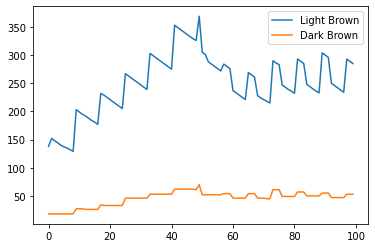

In [45]:
#Write your code here
n_env=Environment.Environment()
for x in range(0,80):
    f_prey= Mouse(sex="F")
    m_prey=Mouse(sex="M")
    f_prey.set_allele(random.randint(0, 2),random.randint(0, 2))
    m_prey.set_allele(random.randint(0, 2),random.randint(0, 2))
    n_env.add_agent(f_prey)
    n_env.add_agent(m_prey)
for x in range(0,4):
    m1_pred=Hawk()
    n_env.add_agent(m1_pred)
n_env.simulate_plot_populations(100)

### 2.4 (5 Points)

**Describe the differences between your results using the `Hawk` and `Mouse` class and the results from part 1.5. If and how does this model capture the effects of natural selection?**

There are no other differences between my results from part 1.5 and the Hawk and Mouse class. this model captures the effects of natural selection because the mice that survive the predators are the ones that are shown in the blue and the the hawks that survive when there are dips in levels of mice are shown in orange.

---
### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

## Git push, and then merge your `hw03_branch` into your `main` branch.